In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Load the data 
df= pd.read_csv('C:\\Users\\PC\\FreeCodeCamp_DataAnalysis_Cert\\boilerplate-medical-data-visualizer\\medical_examination.csv')
df.columns = df.columns.str.strip()
df.index = df.index+1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
5,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df['Over weight']= (df['weight'] /((df['height']/100)**2)>25).astype(int)

In [ ]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,Over weight
1,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
2,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
3,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
4,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
5,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [20]:
df.shape

(70000, 14)

In [ ]:
#Normalize data by making 0 always good and 1 always bad. 
# If the value of 'cholesterol' or 'gluc' is 1, set it to 0. 
# If the value is greater than 1, set it to 1.
# Check to see that it worked
df['cholesterol'] =(df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)
df[['cholesterol', 'gluc']].head()

,cholesterol,gluc
1,0,0
2,1,0
3,1,0
4,0,0
5,0,0


In [13]:
# Create df_cat using pd.melt
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'Over weight'])
# Group the data to get the counts for the chart
df_cat = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='total')

In [ ]:
#Check to confirm the new table
df_cat.head(10)

,cardio,variable,value,total
0,0,Over weight,0,15915
1,0,Over weight,1,19106
2,0,active,0,6378
3,0,active,1,28643
4,0,alco,0,33080
5,0,alco,1,1941
6,0,cholesterol,0,29330
7,0,cholesterol,1,5691
8,0,gluc,0,30894
9,0,gluc,1,4127


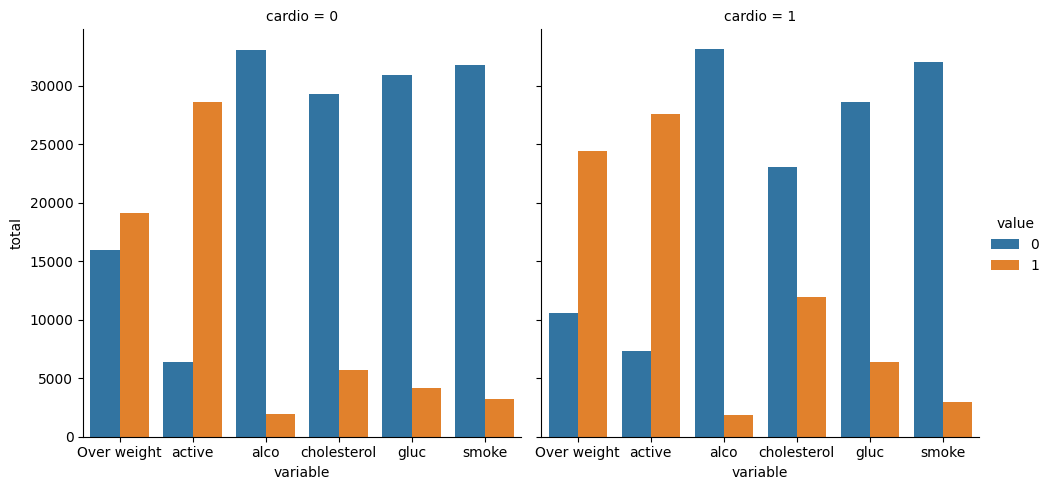

In [16]:
# Create the chart
fig = sns.catplot(
    data=df_cat, 
    x='variable', 
    y='total', 
    hue='value', 
    col='cardio', 
    kind='bar'
).fig

In [17]:
#Create the heat map data frame
# Clean the data by filtering out 'incorrect' blood pressure readings 
# and extreme outliers in height and weight (top and bottom 2.5%).
df_heat = df[
    (df['ap_lo'] <= df['ap_hi']) & 
    (df['height'] >= df['height'].quantile(0.025)) & 
    (df['height'] <= df['height'].quantile(0.975)) & 
    (df['weight'] >= df['weight'].quantile(0.025)) & 
    (df['weight'] <= df['weight'].quantile(0.975))
]

In [19]:
#Check that the number of rows reduced
df_heat.shape

(63259, 14)

In [ ]:
#Calculate the correlation matrix
corr= df_heat.corr()
#Create a triangle mask
mask = np.triu(np.ones_like(corr, dtype=bool))

<Axes: >

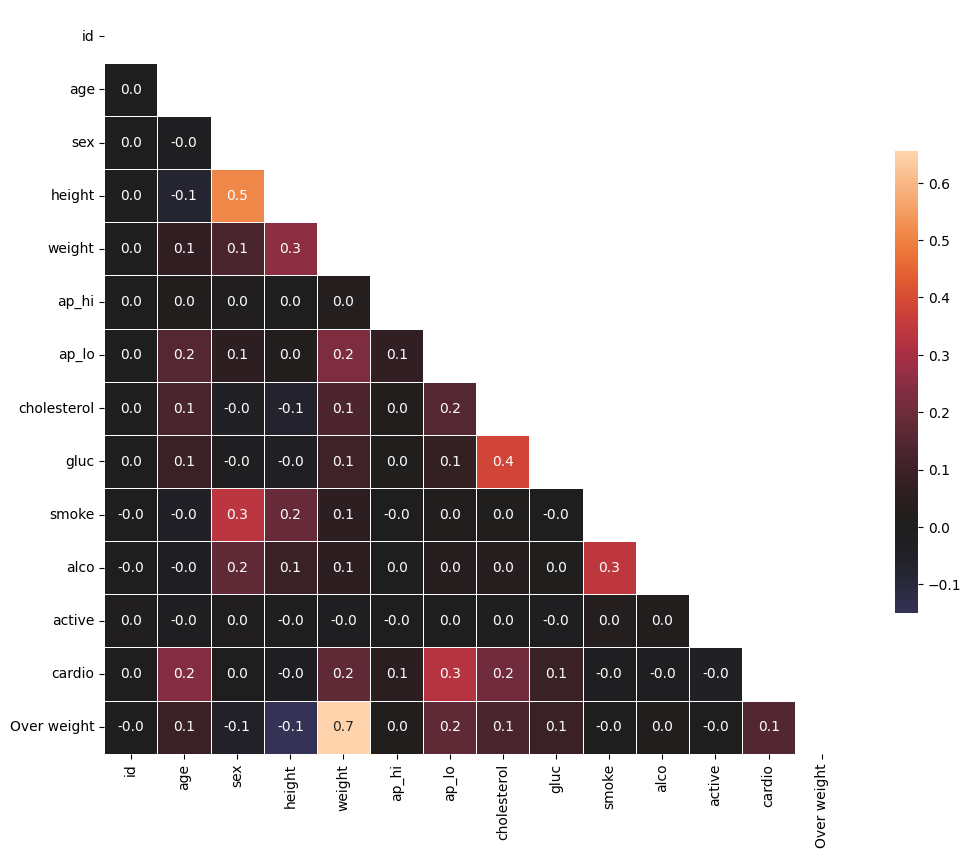

In [ ]:
#Set up the matplotlib figure
fig, ax=plt.subplots(figsize=(12,12))
# Draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt='.1f', 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={'shrink': .5}
            )